# Домашняя работа 2. Логистическая регрессия.
# Дмитрий Головинов BAE 26


### Оценивание и штрафы

Максимальная оценка — 10 баллов.

Не списывайте, иначе всем участникам обнулим :)

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка: 9 (я так и не разобрался с оценками, но линейную регрессию я проверил на 4 разных датасетах и вроде все работает)

In [14]:
print('Всем удачи!👒')

Всем удачи!👒


In [15]:
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Часть 1. Логрег своими руками (5.5 балла)

**Задание 1 (8 баллов)**. Реализуйте логистическую регрессию, обучаемую с помощью:
- градиентного спуска **(4 балла)**

- стохастического градиентного спуска **(4 балла)**

Во всех пунктах необходимо соблюдать два условия:
- Циклы можно использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

    - проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$), задаваемого параметром `tolerance`;
    - достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, добавим атрибут класса `loss_history`. В нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.

Инициализировать веса можно случайным образом или нулевым вектором.

In [16]:
from sklearn.base import BaseEstimator
import numpy as np

class LogReg(BaseEstimator):
    def __init__(self, gd_type: str = 'stochastic', tolerance: float = 1e-4,
                 max_iter: int = 1000, eta: float = 1e-2,
                 w0: np.array = None) -> None:
        """
        Args:
          gd_type: Type of gradient descent ('full' or 'stochastic').
          tolerance: Threshold for stopping gradient descent.
          max_iter: Maximum number of steps in gradient descent.
          eta: Learning rate.
          w0: Array of shape d (d — number of weights to optimize).
              Initial weights.
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.eta = eta
        self.w0 = w0
        self.w = None
        self.loss_history = None

    def fit(self, X: np.array, y: np.array) -> LogReg:
        """
        Train the model. Also, save value of loss after each iteration.
        """
        # Adding a bias term to the dataset
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        if self.w0 is None:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = self.w0

        self.loss_history = []
        for i in range(self.max_iter):
            if self.gd_type == 'full':
                gradient = self.calc_gradient(X, y)
            elif self.gd_type == 'stochastic':
                idx = np.random.randint(X.shape[0])
                gradient = self.calc_gradient(X[idx:idx+1], y[idx:idx+1])
            else:
                raise ValueError("Invalid gradient descent type")

            w_new = self.w - self.eta * gradient
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)

            if np.linalg.norm(w_new - self.w, ord=2) < self.tolerance:
                break

            self.w = w_new

        return self

    def predict_proba(self, X: np.array) -> np.array:
        """
        Calculate probability of positive and negative class for each observation.
        """
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        p_positive = 1 / (1 + np.exp(-np.dot(X, self.w)))
        p_negative = 1 - p_positive
        return np.vstack([p_negative, p_positive]).T

    def predict(self, X: np.array) -> np.array:
        """
        Predict class label for each observation.
        """
        probas = self.predict_proba(X)
        return (probas[:, 1] >= 0.5).astype(int)

    def calc_gradient(self, X: np.array, y: np.array) -> np.array:
        """
        Compute gradient of loss function for given data point and current weights.
        """
        y_pred = 1 / (1 + np.exp(-np.dot(X, self.w)))
        gradient = -np.dot(X.T, (y - y_pred)) / len(X)
        return gradient

    def calc_loss(self, X: np.array, y: np.array) -> float:
        """
        Compute the value of the log loss function for given data point and current weights.
        """
        y_pred = 1 / (1 + np.exp(-np.dot(X, self.w)))
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

Далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

Далее мы бы всем советовали использовать готовые реализации методов из sklearn.

Сгенерируем синтетические данные.

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Задание 2 (1 балл).** Обучите логистическую регрессию на синтетических данных. Нарисуйте кривую обучения.

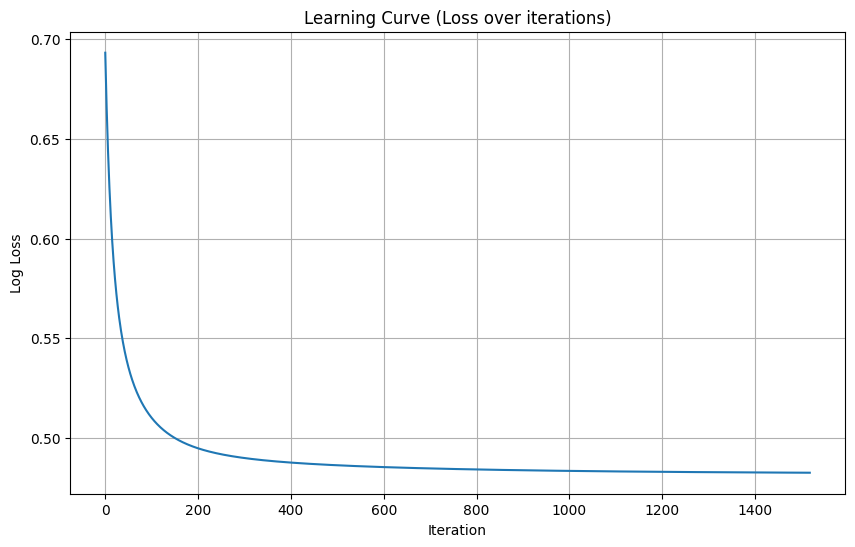

In [21]:
# Initialize and train the logistic regression model on the provided dataset
logreg_synthetic = LogReg(gd_type='full', eta=0.01, max_iter=5000)
logreg_synthetic.fit(X_train, y_train)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(logreg_synthetic.loss_history)
plt.title("Learning Curve (Loss over iterations)")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()

# Learning curve has right shape (Iteration растет -> Log loss падает)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

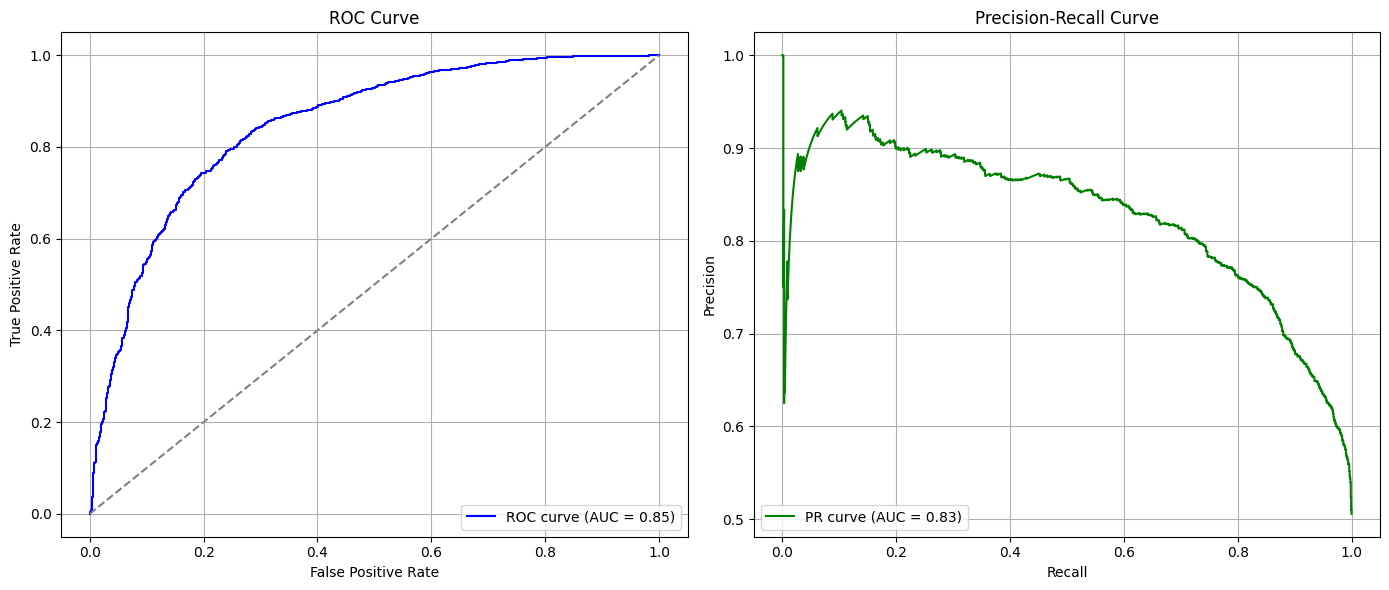

(0.8477115505058205, 0.8275220494922406)

In [23]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

# Predict probabilities on the test set
probas = logreg_synthetic.predict_proba(X_test)
y_scores = probas[:, 1]

# Calculate roc-auc and pr-auc scores
roc_auc = roc_auc_score(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Compute roc curve values
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

# Compute pr curve values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

# Plotting roc and PR curves
plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()

roc_auc, pr_auc
# Output ((0.8477115505058205, 0.8275220494922406))


**Задание 3 (1 балл).** Оцените ошибку ROC-AUC и PR-AUC вашей модели при помощи K-fold кросс валидации.  

In [24]:
from sklearn.model_selection import KFold

# Number of folds (I took K = 5 here because it is чаще всего common choice)
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

roc_aucs = []
pr_aucs = []

# K-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Train the logistic regression model on the current fold's training data
    logreg_kfold = LogReg(gd_type='full', eta=0.01, max_iter=5000)
    logreg_kfold.fit(X_train_fold, y_train_fold)

    # Predict probabilities on the validation set
    probas_fold = logreg_kfold.predict_proba(X_val_fold)
    y_scores_fold = probas_fold[:, 1]

    # Compute ROC-AUC and PR-AUC for the validation set
    roc_auc_fold = roc_auc_score(y_val_fold, y_scores_fold)
    pr_auc_fold = average_precision_score(y_val_fold, y_scores_fold)

    roc_aucs.append(roc_auc_fold)
    pr_aucs.append(pr_auc_fold)

# Calculate average ROC-AUC and PR-AUC across all folds
avg_roc_auc = np.mean(roc_aucs)
avg_pr_auc = np.mean(pr_aucs)

avg_roc_auc, avg_pr_auc

# Output (0.850237640036428, 0.8215705064727128)


(0.850237640036428, 0.8215705064727128)